In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import rebound
import reboundx
from reboundx import constants
import numpy as np
import datetime
from astropy import constants as const
import nbody as nb
au = const.au.value
R_jup = const.R_jup.value
G = const.G.value
c = const.c.value
M_sun = const.M_sun.value
years = nb.years

In [20]:
nb.runsim?

In [21]:
tmax = 10*years
Nout = 1e3
sim = nb.makesim()
nb.runsim(sim, tmax, Nout, gr=False, tides=False, integrator='ias15')

Simulation start: 2019-10-30T09:24:43.308480

INTEGRATING . . .



Simulation end: 2019-10-30T09:24:44.357403
Runtime: 1.048923 s
Simulation archive: simulation_archive/sa20191030T092443.bin


/storage/home/len56/.local/lib/python3.6/site-packages/rebound/simulationarchive.py:132: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


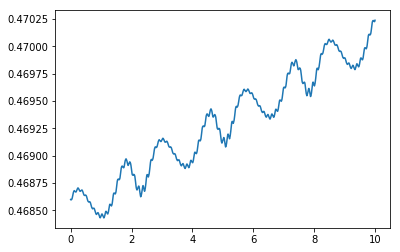

In [23]:
file = 'simulation_archive/sa20191030T092443.bin'
sa = rebound.SimulationArchive(file)
e = np.zeros(len(sa))
t = np.zeros(len(sa))
for i, sim in enumerate(sa):
    e[i] = sim.particles[1].e
    t[i] = sim.t
t = t/years    
plt.plot(t,e);


In [7]:

tmax = 100
Nout=100
times = np.linspace(0,tmax,Nout)




In [8]:
pomega1_hut, pomega2_hut, Eerr_hut = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
for i, time in enumerate(times):
    sim.integrate(time)
    pomega1_hut[i] = ps[1].pomega
    pomega2_hut[i] = ps[2].pomega

In [12]:
pomega1_wm, pomega2_wm, Eerr_wm = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
for i, time in enumerate(times):
    sim.integrate(time)
    pomega1_wm[i] = ps[1].pomega
    pomega2_wm[i] = ps[2].pomega

/storage/home/len56/.local/lib/python3.6/site-packages/rebound/simulation.py:664: RuntimeWarning: At least 10 predictor corrector loops in IAS15 did not converge. This is typically an indication of the timestep being too large.
  warnings.warn(msg[1:], RuntimeWarning)


Text(0,0.5,'Energy Error')

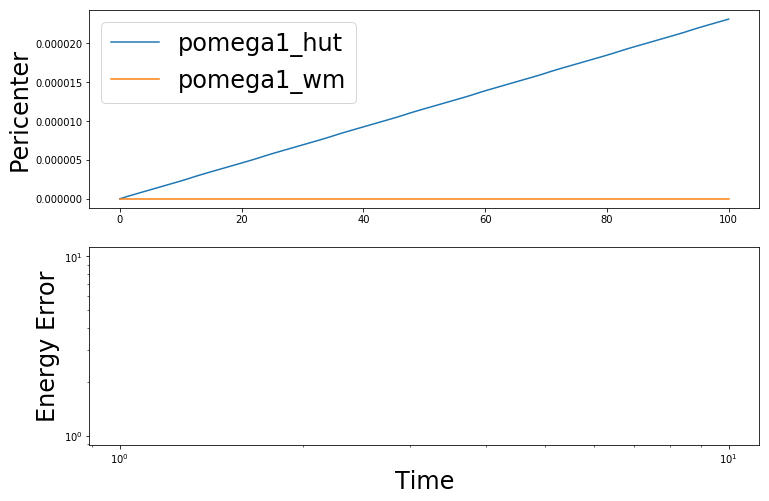

In [13]:
fig, axarr = plt.subplots(nrows=2, figsize=(12,8))
axarr[0].plot(times, pomega1_hut, label="pomega1_hut")
#axarr[0].plot(times, pomega2_hut, label="pomega2_hut")
axarr[0].plot(times, pomega1_wm, label="pomega1_wm")
#axarr[0].plot(times, pomega2_wm, label="pomega2_wm")
axarr[0].set_ylabel("Pericenter", fontsize=24)
axarr[0].legend(fontsize=24)
#axarr[1].plot(times, Eerr, '.')
axarr[1].set_xscale('log')
axarr[1].set_yscale('log')
axarr[1].set_xlabel('Time', fontsize=24)
axarr[1].set_ylabel('Energy Error', fontsize=24)

In [8]:
bovera = (8*G*)**(-1./3.)


1.9884754153381438e+30